# ADA-GEJIN-AS2

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

import numpy as np
import pandas as pd
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from dmba import regressionSummary, exhaustive_search

from sklearn import metrics
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , accuracy_score , precision_score , recall_score , f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
from mord import LogisticIT



import warnings
warnings.filterwarnings('ignore')

no display found. Using non-interactive Agg backend


### 1.Exercise 1 Iris Classiﬁcation. 
The Iris Data set was created by R.A. Fisher and is perhaps the best known data set to be found in the pattern recognition literature. The data set, Iris, contains three classes of 50 instances each, where each class refers to a speciﬁc type of iris plant. Predicted attribute (target): class of iris.

Using the prescriptive method of conducting classiﬁcation problems, create one Python notebook that classiﬁes this data set utilizing the following classiﬁcation models:

- K Nearest Neighbors (KNN)

- Naive Bayes

- Logistic Regression

Comment your notebook and in the end, rank and explain the classiﬁcation models from best to worst.

In [2]:
#Import the necessary libraries and load the data set
df1 = pd.read_csv('Iris.csv')
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df1.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df1.shape

(150, 6)

In [6]:
#create a new Column for numerical representation of Species
df1['class']=df1.Species.astype('category').cat.codes

In [7]:
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [8]:
#Select X and Y columns,split the dataframe into random train and test subsets
X=df1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
Y=df1['class']
classes = ['setosa', 'versicolor','virginica']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)

#### KNN

In [9]:
# iterate over a range of nearest neighbor values
# train and check with test
results = []
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train,Y_train)
    results.append({'k': k, 'accuracy': accuracy_score(Y_test, knn.predict(X_test))})
results = pd.DataFrame(results)
print(results)
# Find the k value with the highest accuracy
best_k = results['k'][results['accuracy'].idxmax()]
print("The best k value is:", best_k)


     k  accuracy
0    1  0.977778
1    2  0.977778
2    3  0.977778
3    4  0.955556
4    5  0.977778
5    6  0.977778
6    7  1.000000
7    8  0.977778
8    9  1.000000
9   10  1.000000
10  11  1.000000
11  12  1.000000
12  13  1.000000
13  14  0.977778
14  15  0.977778
15  16  0.977778
16  17  0.977778
17  18  0.977778
18  19  0.977778
19  20  0.955556
20  21  0.955556
21  22  0.955556
22  23  0.955556
23  24  0.955556
24  25  0.977778
25  26  0.955556
26  27  0.955556
27  28  0.955556
28  29  0.955556
The best k value is: 7


In [10]:
# Train and predict using the best k value
knn = KNeighborsClassifier(n_neighbors=best_k).fit(X_train,Y_train)
classificationSummary(Y_train, knn.predict(X_train), class_names=classes) 
print()
classificationSummary(Y_test, knn.predict(X_test), class_names=classes)
print()

Confusion Matrix (Accuracy 0.9714)

           Prediction
    Actual     setosa versicolor  virginica
    setosa         34          0          0
versicolor          0         38          1
 virginica          0          2         30

Confusion Matrix (Accuracy 1.0000)

           Prediction
    Actual     setosa versicolor  virginica
    setosa         16          0          0
versicolor          0         11          0
 virginica          0          0         18



#### Naive Bayes

In [11]:
# run naive Bayes
nb = MultinomialNB(alpha=0.01)
nb.fit(X_train, Y_train)

# predict probabilities
predProb_train = nb.predict_proba(X_train)
predProb_test = nb.predict_proba(X_test)

# predict class membership
Y_train_pred = nb.predict(X_train)
Y_test_pred = nb.predict(X_test)

# get the accuracy
classificationSummary(Y_train, Y_train_pred, class_names=classes) 
print()
classificationSummary(Y_test, Y_test_pred, class_names=classes)
print()

Confusion Matrix (Accuracy 0.7048)

           Prediction
    Actual     setosa versicolor  virginica
    setosa         34          0          0
versicolor          0         39          0
 virginica          0         31          1

Confusion Matrix (Accuracy 0.6444)

           Prediction
    Actual     setosa versicolor  virginica
    setosa         16          0          0
versicolor          0         11          0
 virginica          0         16          2



#### Logistic Regression

In [12]:
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
lr=LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
lr.fit(X_train,Y_train)

print('intercept ', lr.intercept_[0])
print(pd.DataFrame({'coeff': lr.coef_[0]}, index=X.columns).transpose())
print()

### Akaike information criterion (AIC) (Akaike, 1974) is a fined technique based on in-sample 
### fit to estimate the likelihood of a model to predict/estimate the future values.
print('AIC', AIC_score(Y_test, lr.predict(X_test), df = len(X_train.columns) + 1))

intercept  0.7416300024337619
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
coeff       1.137642      5.325782      -7.578103     -3.845713

AIC -0.4037209260462902


In [13]:
# predict class membership
Y_trainpred=lr.predict(X_train)
Y_testpred=lr.predict(X_test)
Y_testproba = lr.predict_proba(X_test)

#get the accuracy
classificationSummary(Y_train, Y_trainpred, class_names=classes)
classificationSummary(Y_test, Y_testpred, class_names=classes)

Confusion Matrix (Accuracy 0.9714)

           Prediction
    Actual     setosa versicolor  virginica
    setosa         34          0          0
versicolor          0         37          2
 virginica          0          1         31
Confusion Matrix (Accuracy 0.9556)

           Prediction
    Actual     setosa versicolor  virginica
    setosa         16          0          0
versicolor          0         10          1
 virginica          0          1         17


- Comments:
The accrancy of KNN classification model is 1.
The accurancy of Naive Bayes classification model is 0.6444.
The accurancy of Logistic Regression classification model is 0.9556.

So rank from highest to lowest: KNN > Logistic Regression > Naive Bayes.

KNN is a good fit for small to medium-sized datasets with complex interactions between features and irregular decision boundaries. As this dataset has only 150 observations and potentially correlated features, KNN is a suitable choice.

Logistic Regression, on the other hand, works better with large datasets and assumes a linear relationship between the predictor variables and the outcome. It may not perform well in the presence of non-linear relationships.

Naive Bayes assumes that features are conditionally independent of each other, which may limit its performance when dealing with complex relationships between features. Therefore, it may not be the best choice for this dataset,as there may be correlations between the different measurements of the iris species.


## Exercise 2 and 3 Diabetes and Spam Email Classiﬁcation. For the following two data sets, complete the following tasks:

Analysis Tasks

• Write a short problem statement. What are you asking of the data set to solve? What domain questions are you trying to answer? Also, please specify the source of the data.

• Describe your data. That entails detailing the exploration of the data, the features, the feature types, and any possible missing data. If you have missing data, what are you going to do? Also, you should perform an exploratory analysis (statistics, visualization, etc.) to understand the data.

In [14]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

import numpy as np
import pandas as pd
import statsmodels.api as sm


from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , accuracy_score , precision_score , recall_score , f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

from dmba import classificationSummary, gainsChart, liftChart
from dmba import regressionSummary, exhaustive_search
from dmba.metric import AIC_score
from mord import LogisticIT

import warnings
warnings.filterwarnings('ignore')

In [15]:
#read the csv file
df2 = pd.read_csv('diabetes.csv')
print(df2.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [16]:
# exploration data shape
df2.shape

(768, 9)

In [17]:
# get the basic information about the data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
#check if there are any duplicated values in the data
df2.duplicated().any()

False

In [19]:
#check if there are any possible missing data
df2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Exploratory analysis

In [20]:
df2['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

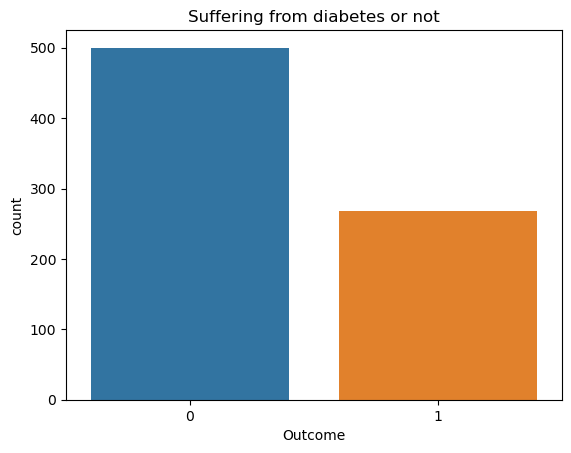

In [21]:
#Graphically show the number of people with and without diabetes
ax = sns.countplot(x= df2.Outcome,data= df2)
ax.set_title('Suffering from diabetes or not')
plt.show()

In [22]:
np.sort(df2.Age.unique())

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72,
       81])

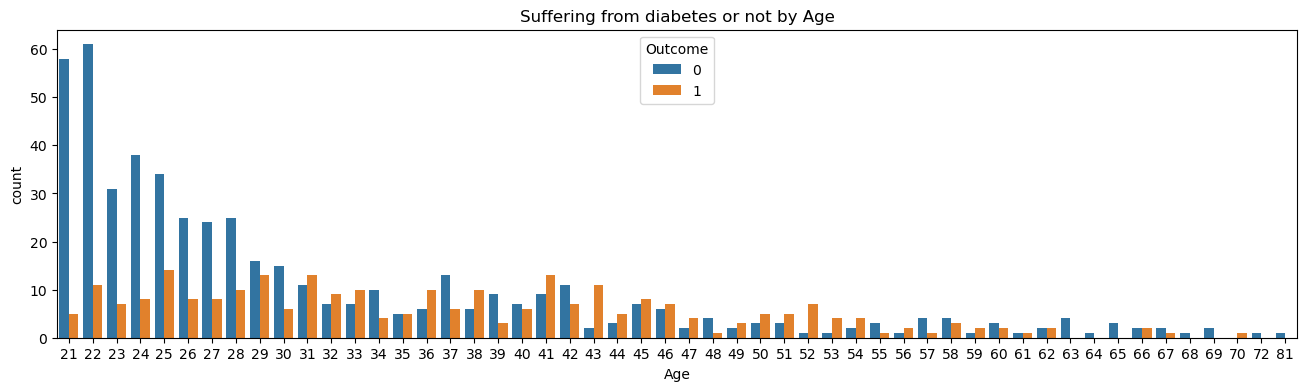

In [23]:
#show the relationship between age and diabetes
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df2.Age,hue=df2.Outcome)
ax.set_title('Suffering from diabetes or not by Age')
plt.show()

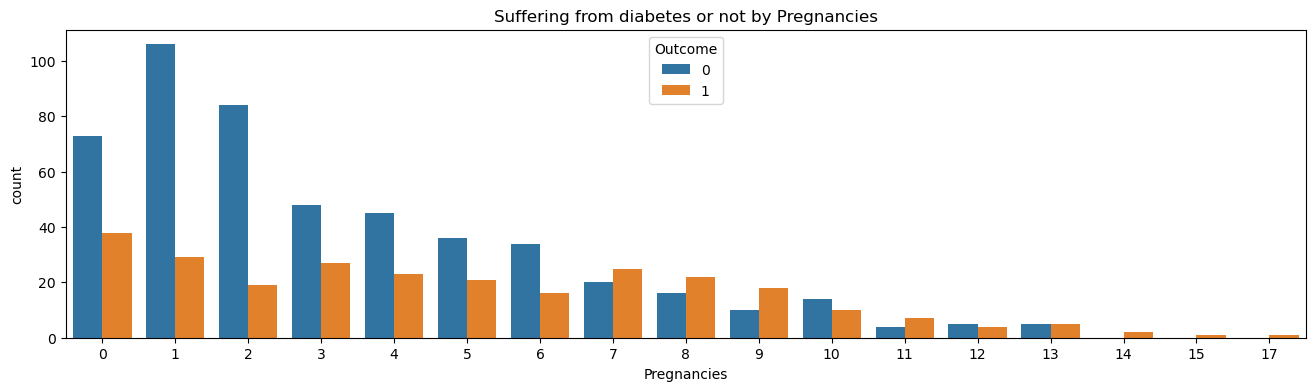

In [24]:
#show the relationship between the number of times pregnant and diabetes
plt.figure(figsize=(16,4))
ax = sns.countplot(x= df2.Pregnancies , hue= df2.Outcome)
ax.set_title('Suffering from diabetes or not by Pregnancies')
plt.show()

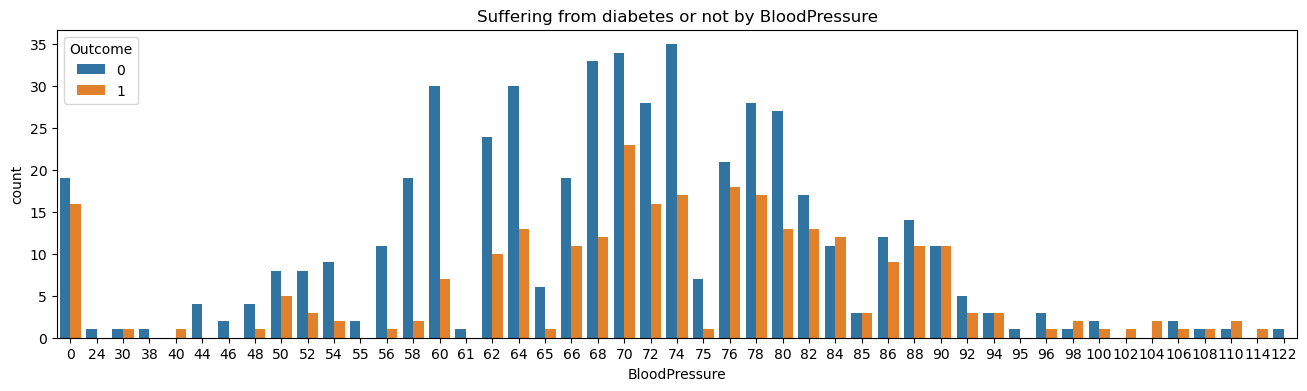

In [25]:
#show the relationship between blood pressure and diabetes
plt.figure(figsize=(16,4))
ax = sns.countplot(x= df2.BloodPressure , hue= df2.Outcome)
ax.set_title('Suffering from diabetes or not by BloodPressure')
plt.show()

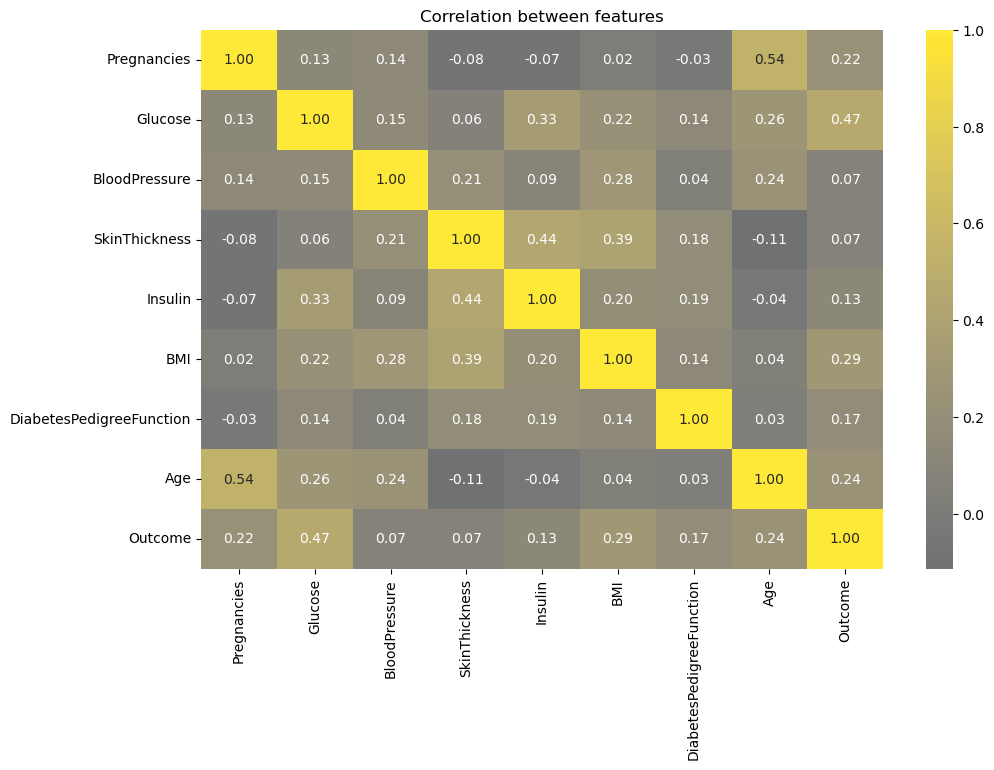

In [26]:
#show the correlation between features
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
corr = df2.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="cividis", center=0, ax=ax)
ax.set_title('Correlation between features')
plt.show()

### Data reduction techniques

In [27]:
# Partition data into both train and test data
train_data, test_data = train_test_split(df2, test_size=0.40, random_state=123)
    
# Initialize normalized training, validation, and complete data frames.
scaler = StandardScaler()
scaler.fit(train_data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']])

# Transform the full dataset
df_normalized = pd.concat([pd.DataFrame(
    scaler.transform(df2[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']]), columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']),
                                      df2[['Age', 'Outcome']]], axis=1)

train_normalized = df_normalized.iloc[train_data.index]
test_normalized = df_normalized.iloc[test_data.index]


In [28]:
# split train data and test data into x and y
predictors = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
train_normalized_x = pd.get_dummies(train_normalized[predictors])
train_normalized_y = train_normalized['Outcome']
test_normalized_x = pd.get_dummies(test_normalized[predictors])
test_normalized_y = test_normalized['Outcome']

### Model selection

#### 2.1Linear_regression

In [29]:
# Build the linear regression model
lr = LinearRegression()
lr.fit(train_normalized_x,train_normalized_y)

# Regression coefficients
print('intercept ', lr.intercept_)
print(pd.DataFrame({'Predictor': train_normalized_x.columns, 'coefficient': lr.coef_}))

# Performance measures
regressionSummary(train_normalized_y, lr.predict(train_normalized_x))

intercept  0.33043478260869563
                  Predictor  coefficient
0               Pregnancies     0.075268
1                   Glucose     0.199755
2             BloodPressure    -0.039504
3             SkinThickness     0.019713
4                   Insulin    -0.033768
5                       BMI     0.099302
6  DiabetesPedigreeFunction     0.041161

Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 0.3982
     Mean Absolute Error (MAE) : 0.3340


In [30]:
lr_pred = lr.predict(test_normalized_x)
# Accuracy measures
regressionSummary(test_normalized_y, lr_pred)
lr.score(test_normalized_x,test_normalized_y)


Regression statistics

               Mean Error (ME) : 0.0173
Root Mean Squared Error (RMSE) : 0.4007
     Mean Absolute Error (MAE) : 0.3311


0.3161485202058497

In [31]:
#use Ridge Regression for Shrinkage 
print('Ridge')
ridge = Ridge(alpha=1)
ridge.fit(train_normalized_x,train_normalized_y)
regressionSummary(test_normalized_y, ridge.predict(test_normalized_x))
print('\nRidge coefficients', ridge.coef_)

Ridge

Regression statistics

               Mean Error (ME) : 0.0174
Root Mean Squared Error (RMSE) : 0.4007
     Mean Absolute Error (MAE) : 0.3313

Ridge coefficients [ 0.07514833  0.19916473 -0.03923743  0.0195466  -0.03334835  0.09911065
  0.04110933]


In [32]:
#use Lasso for Shrinkage
print('Lasso')
lasso = Lasso(alpha=1)
lasso.fit(train_normalized_x,train_normalized_y)
regressionSummary(test_normalized_y, lasso.predict(test_normalized_x))
print('\nLasso coefficients', lasso.coef_)

print('\nLasso Cross-Validation')
lasso_cv = LassoCV(cv=100)
lasso_cv.fit(train_normalized_x,train_normalized_y)
regressionSummary(test_normalized_y, lasso_cv.predict(test_normalized_x))

print('\nLasso-CV chosen regularization: ', lasso_cv.alpha_)

Lasso

Regression statistics

               Mean Error (ME) : 0.0462
Root Mean Squared Error (RMSE) : 0.4867
     Mean Absolute Error (MAE) : 0.4582

Lasso coefficients [0. 0. 0. 0. 0. 0. 0.]

Lasso Cross-Validation

Regression statistics

               Mean Error (ME) : 0.0260
Root Mean Squared Error (RMSE) : 0.4031
     Mean Absolute Error (MAE) : 0.3437

Lasso-CV chosen regularization:  0.014104509190330036


In [33]:
pd.DataFrame({'features': train_normalized_x.columns, 
              'linear regression': lr.coef_, 
              'ridge': ridge.coef_,
              'lasso': lasso.coef_,
              'lassoCV': lasso_cv.coef_})

,features,linear regression,ridge,lasso,lassoCV
0,Pregnancies,0.075268,0.075148,0.0,0.060862
1,Glucose,0.199755,0.199165,0.0,0.174211
2,BloodPressure,-0.039504,-0.039237,0.0,-0.013167
3,SkinThickness,0.019713,0.019547,0.0,0.000000
4,Insulin,-0.033768,-0.033348,0.0,-0.000000
5,BMI,0.099302,0.099111,0.0,0.084788
6,DiabetesPedigreeFunction,0.041161,0.041109,0.0,0.027196


### Logistic regression

In [34]:
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
log_reg=LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
log_reg.fit(train_normalized_x,train_normalized_y)

print('intercept ', log_reg.intercept_[0])
print(pd.DataFrame({'coeff': log_reg.coef_[0]}, index=train_normalized_x.columns).transpose())
print()

### Akaike information criterion (AIC) (Akaike, 1974) is a fined technique based on in-sample 
### fit to estimate the likelihood of a model to predict/estimate the future values.
print('AIC', AIC_score(test_normalized_y, log_reg.predict(test_normalized_x), df = len(test_normalized_x.columns) + 1))

intercept  -0.9645732897716423
       Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
coeff     0.453229  1.200529      -0.220105       0.120532 -0.262776   

            BMI  DiabetesPedigreeFunction  
coeff  0.724917                  0.268062  

AIC 422.2407300706349


In [35]:
y_trainpred=log_reg.predict(train_normalized_x)
y_testpred=log_reg.predict(test_normalized_x)
y_testproba = log_reg.predict_proba(test_normalized_x)

# get the accuracy
classificationSummary(train_normalized_y, y_trainpred)
classificationSummary(test_normalized_y, y_testpred)

Confusion Matrix (Accuracy 0.7717)

       Prediction
Actual   0   1
     0 277  31
     1  74  78
Confusion Matrix (Accuracy 0.7825)

       Prediction
Actual   0   1
     0 169  23
     1  44  72


In [36]:
# iterate over a range of nearest neighbor values
# train and check with test
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_normalized_x,train_normalized_y)
    results.append({'k': k, 'accuracy': accuracy_score(test_normalized_y, knn.predict(test_normalized_x))})
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.698052
1    2  0.691558
2    3  0.711039
3    4  0.727273
4    5  0.714286
5    6  0.711039
6    7  0.707792
7    8  0.730519
8    9  0.733766
9   10  0.724026
10  11  0.730519
11  12  0.730519
12  13  0.733766
13  14  0.714286


In [37]:
# when k=9 we have maximum accuracy
knn = KNeighborsClassifier(n_neighbors=9).fit(train_normalized_x,train_normalized_y)
# get the accuracy
classificationSummary(train_normalized_y, knn.predict(train_normalized_x)) 
print()
classificationSummary(test_normalized_y, knn.predict(test_normalized_x))
print()

Confusion Matrix (Accuracy 0.7696)

       Prediction
Actual   0   1
     0 276  32
     1  74  78

Confusion Matrix (Accuracy 0.7338)

       Prediction
Actual   0   1
     0 170  22
     1  60  56



In [38]:
# when k=13 we have maximum accuracy
knn = KNeighborsClassifier(n_neighbors=13).fit(train_normalized_x,train_normalized_y)
# get the accuracy
classificationSummary(train_normalized_y, knn.predict(train_normalized_x)) 
print()
classificationSummary(test_normalized_y, knn.predict(test_normalized_x))
print()
#It shows that when k=13 the result is better

Confusion Matrix (Accuracy 0.7870)

       Prediction
Actual   0   1
     0 285  23
     1  75  77

Confusion Matrix (Accuracy 0.7338)

       Prediction
Actual   0   1
     0 172  20
     1  62  54



In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
# Train a Gaussian Naive Bayes classifier
nb = GaussianNB()
nb.fit(train_normalized_x,train_normalized_y)

# predict probabilities
predProb_train = nb.predict_proba(train_normalized_x)
predProb_test = nb.predict_proba(test_normalized_x)

# predict class membership
Y_train_pred = nb.predict(train_normalized_x)
Y_test_pred = nb.predict(test_normalized_x)

# Evaluate the classification performance
print('Classification Report for Train Data:')
print(classification_report(train_normalized_y, Y_train_pred))

print('Classification Report for Test Data:')
print(classification_report(test_normalized_y, Y_test_pred))


Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       308
           1       0.67      0.57      0.61       152

    accuracy                           0.77       460
   macro avg       0.74      0.71      0.72       460
weighted avg       0.76      0.77      0.76       460

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.77      0.85      0.80       192
           1       0.69      0.57      0.63       116

    accuracy                           0.74       308
   macro avg       0.73      0.71      0.72       308
weighted avg       0.74      0.74      0.74       308



In [40]:
#There are negative values after the data is normalized, so we use the original train data and test data
train_x = pd.get_dummies(train_data[predictors])
train_y = train_data['Outcome']
test_x = pd.get_dummies(test_data[predictors])
test_y = test_data['Outcome']

In [41]:
# run naive Bayes
nb = MultinomialNB(alpha=0.01)
nb.fit(train_x,train_y)

# predict probabilities
predProb_train = nb.predict_proba(train_x)
predProb_test = nb.predict_proba(test_x)

# predict class membership
Y_train_pred = nb.predict(train_x)
Y_test_pred = nb.predict(test_x)

# accuracy
classificationSummary(train_y, Y_train_pred) 
print()
classificationSummary(test_y, Y_test_pred)
print()

Confusion Matrix (Accuracy 0.6370)

       Prediction
Actual   0   1
     0 218  90
     1  77  75

Confusion Matrix (Accuracy 0.5487)

       Prediction
Actual   0   1
     0 131  61
     1  78  38



The accracy of Linear_regression model is 0.3161.

The accracy of KNN classification model is 0.7338.

The accuracy of Naive Bayes classification model is 0.7435.

The accuracy of Logistic Regression classification model is 0.7825.

Therefore, Logistic Regression classification model is a good fit for this dataset.

### Unseen Data

In [42]:
#build a set of predict data
predict_data = {
    'Pregnancies':[1,10,3,9,5,6,7,8,4,2],
    'Glucose':[70,80,180,100,110,120,130,90,150,160],
    'BloodPressure':[60,66,70,78,75,96,80,87,98,84],
    'SkinThickness':[0,26,35,36,44,33,22,25,39,48],
    'Insulin':[116,231,756,94,198,265,0,155,598,388],
    'BMI':[28.2,30.2,36.2,42.6,29.5,28.5,27.5,39.6,30.6,28.6],
    'DiabetesPedigreeFunction':[0.156,0.136,0.259,0.298,0.579,0.689,0.190,0.422,0.894,0.29],
}

predict_df = pd.DataFrame(predict_data)
predict_normalized = pd.DataFrame(scaler.transform(predict_df),columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction'])
                                


In [43]:
df_x = df_normalized[predictors]
df_y = df_normalized['Outcome']

#Use KNN model with k=13
#Train the model using the full dataset
knn = KNeighborsClassifier(n_neighbors=13).fit(df_x,df_y)
distances, indices = knn.kneighbors(predict_normalized)
predictions = knn.predict(predict_normalized)

#show predictions
for index, prediction in enumerate(predictions):
    print(64 * '-')
    print(prediction)
    print(predict_df.iloc[index])
    print(df2.iloc[indices[index], :])
    print(df_normalized.iloc[indices[index], :])

----------------------------------------------------------------
0
Pregnancies                   1.000
Glucose                      70.000
BloodPressure                60.000
SkinThickness                 0.000
Insulin                     116.000
BMI                          28.200
DiabetesPedigreeFunction      0.156
Name: 0, dtype: float64
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
466            0       74             52             10       36  27.8   
729            2       92             52              0        0  30.1   
32             3       88             58             11       54  24.8   
694            2       90             60              0        0  23.5   
331            2       87             58             16       52  32.7   
570            3       78             70              0        0  32.5   
55             1       73             50             10        0  23.0   
461            1       71             62              0        0 

In [44]:
#Use Naive Bayes model
#Train the model using the full dataset
#There are negative values after the data is normalized, so we use the original data
nb.fit(df2[predictors],df2['Outcome'])
predictions = nb.predict(predict_df)

#show predictions
for index, prediction in enumerate(predictions):
    print(64 * '-')
    print(prediction)
    print(predict_df.iloc[index])

----------------------------------------------------------------
1
Pregnancies                   1.000
Glucose                      70.000
BloodPressure                60.000
SkinThickness                 0.000
Insulin                     116.000
BMI                          28.200
DiabetesPedigreeFunction      0.156
Name: 0, dtype: float64
----------------------------------------------------------------
1
Pregnancies                  10.000
Glucose                      80.000
BloodPressure                66.000
SkinThickness                26.000
Insulin                     231.000
BMI                          30.200
DiabetesPedigreeFunction      0.136
Name: 1, dtype: float64
----------------------------------------------------------------
1
Pregnancies                   3.000
Glucose                     180.000
BloodPressure                70.000
SkinThickness                35.000
Insulin                     756.000
BMI                          36.200
DiabetesPedigreeFunction      0

# 3

In [45]:
#read the csv file
df = pd.read_csv('spambase_csv.csv')
print(df.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_%3B  char_freq_%28  \
0             0.00            0.00  ...           0.00          0.0

In [46]:
# exploration data shape
df.shape

(4601, 58)

In [47]:
# get the basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [48]:
#check if there are any duplicated values in the data
df.duplicated().sum()

391

In [49]:
# identify the duplicate rows
duplicates = df[df.duplicated()]

# print the duplicate rows
print(duplicates)

      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
26               0.0                0.0           0.00           0.0   
103              0.0                0.0           0.64           0.0   
104              0.0                0.0           0.00           0.0   
105              0.0                0.0           0.64           0.0   
106              0.0                0.0           0.00           0.0   
...              ...                ...            ...           ...   
4439             0.0                0.0           0.74           0.0   
4441             0.0                0.0           0.74           0.0   
4537             0.0                0.0           0.00           0.0   
4541             0.0                0.0           0.00           0.0   
4550             0.0                0.0           0.00           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
26              0.0            0.00               0.0     

In [50]:
#df.drop_duplicates(inplace=True)

If the duplicates represent exact copies of the same spam email message, removing them may be appropriate. This can help to reduce the size of the dataset and prevent duplicate emails from biasing any analysis or modeling.

However, if the duplicates represent variations of the same spam email message (e.g. different subject lines or sender addresses), keeping them may be necessary to capture the full range of the spam messages.

In this exercise, I choose to keep the duplicates.

In [51]:
#check if there are any possible missing data
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [52]:
df['class'].value_counts()

0    2788
1    1813
Name: class, dtype: int64

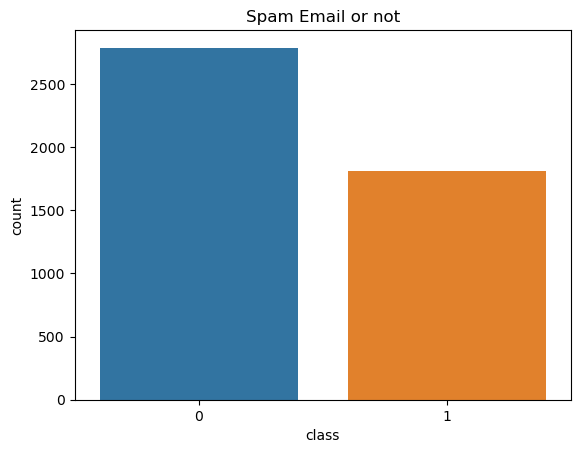

In [53]:
#Graphically show the number of spam emails and non-spam emails
ax = sns.countplot(x= df['class'] , data= df)
ax.set_title('Spam Email or not')
plt.show()

In [54]:
np.sort(df.word_freq_make.unique())

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.93, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01,
       1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.11, 1.12, 1.14,
       1.16, 1.17, 1.18, 1.19, 1.23, 1.24, 1.26, 1.31, 1.36, 1.39, 1.42,
       1.44, 1.47, 1.49, 1.61, 1.63, 1.75, 1.88, 2.  , 2.12, 2.27, 2.32,
       2.35, 2.43, 2.77, 2.85, 3.03, 3.84, 3.94, 4.  , 4.34, 4.54])

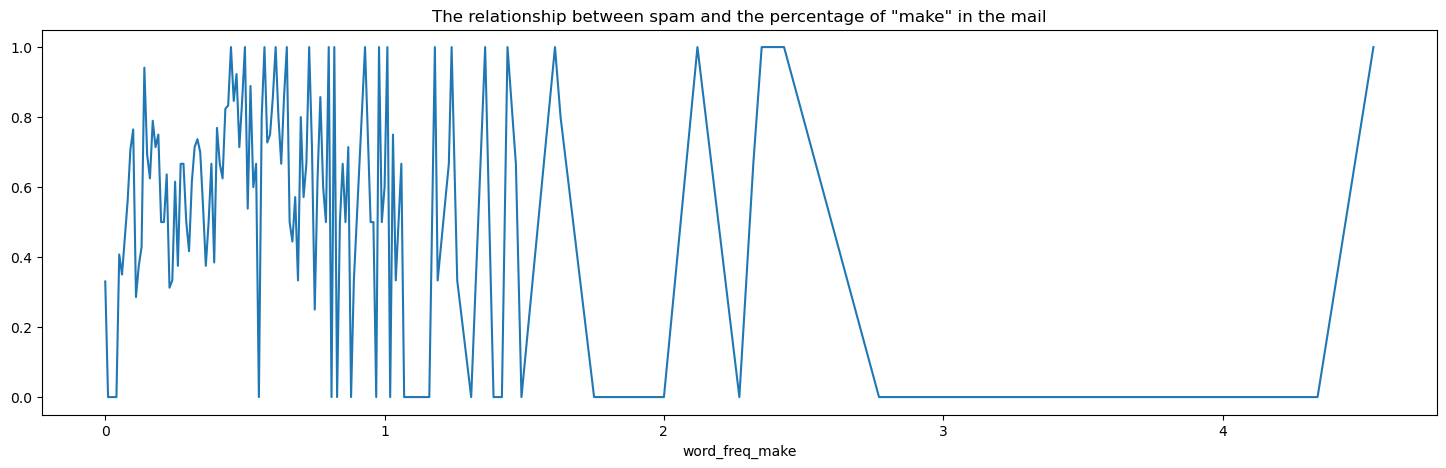

In [55]:
#show the relationship between spam and the percentage of "make" in the mail
word_freq_make = df.groupby('word_freq_make')['class'].mean()
ax = word_freq_make.plot(kind='line',figsize=(18,5))
ax.set_title('The relationship between spam and the percentage of "make" in the mail')
plt.show()

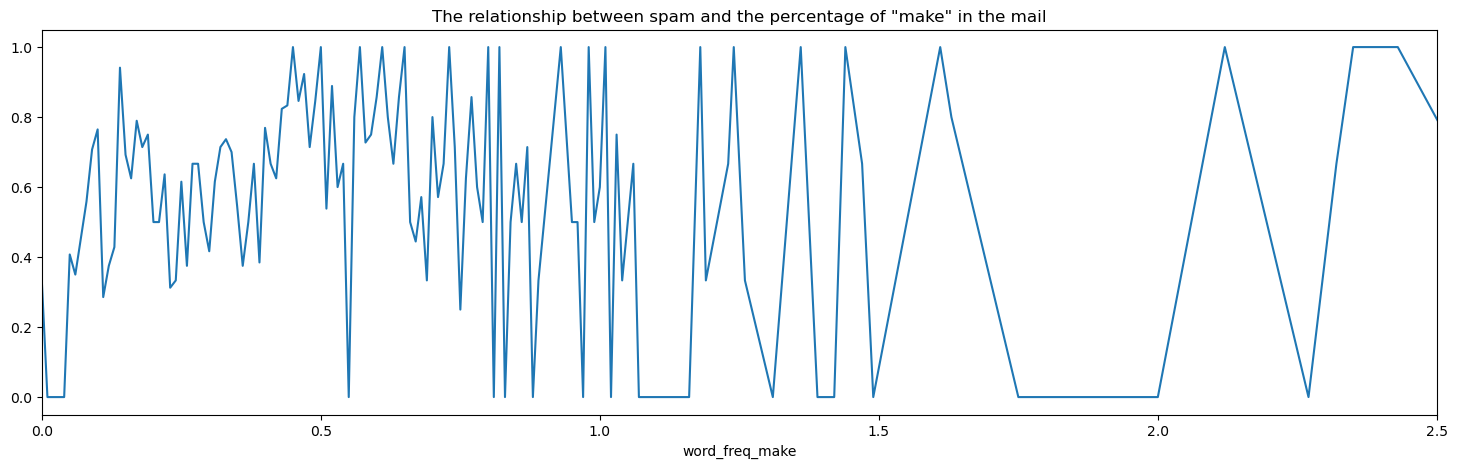

In [56]:
#The distribution of data between 0 and 2.5 is dense, 
#resulting in a compact arrangement of the images in this part
#so intercept this part of the image and zoom in for observation
word_freq_make = df.groupby('word_freq_make')['class'].mean()
ax = word_freq_make.plot(kind='line',figsize=(18,5))
ax.set_title('The relationship between spam and the percentage of "make" in the mail')
plt.xlim(0,2.5)
plt.show()

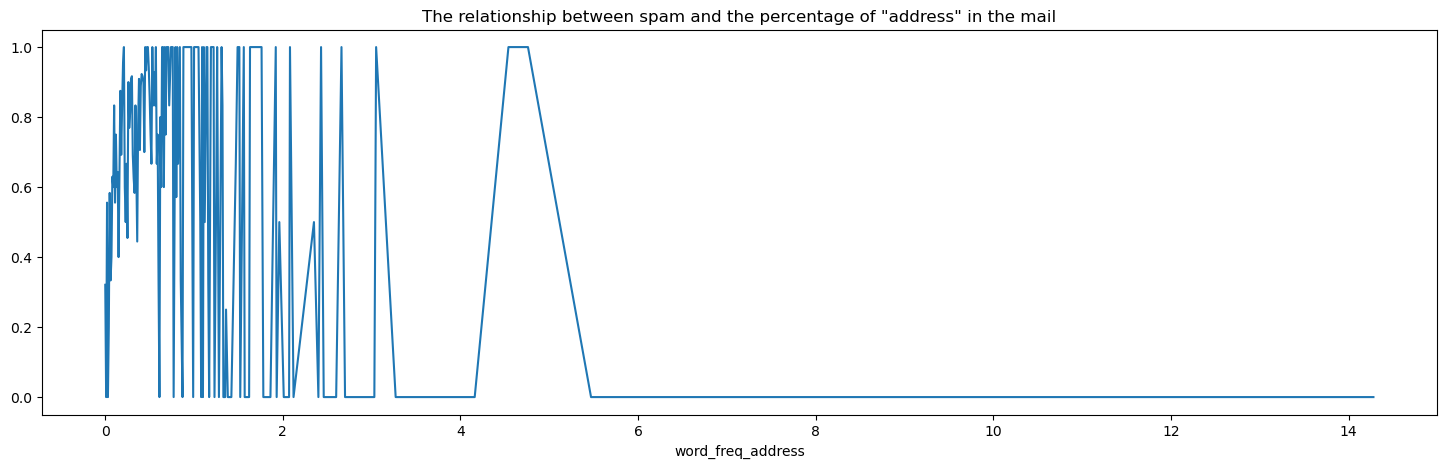

In [57]:
#show the relationship between spam and the percentage of "address" in the mail
word_freq_address = df.groupby('word_freq_address')['class'].mean()
ax = word_freq_address.plot(kind='line',figsize=(18,5))
ax.set_title('The relationship between spam and the percentage of "address" in the mail')
plt.show()

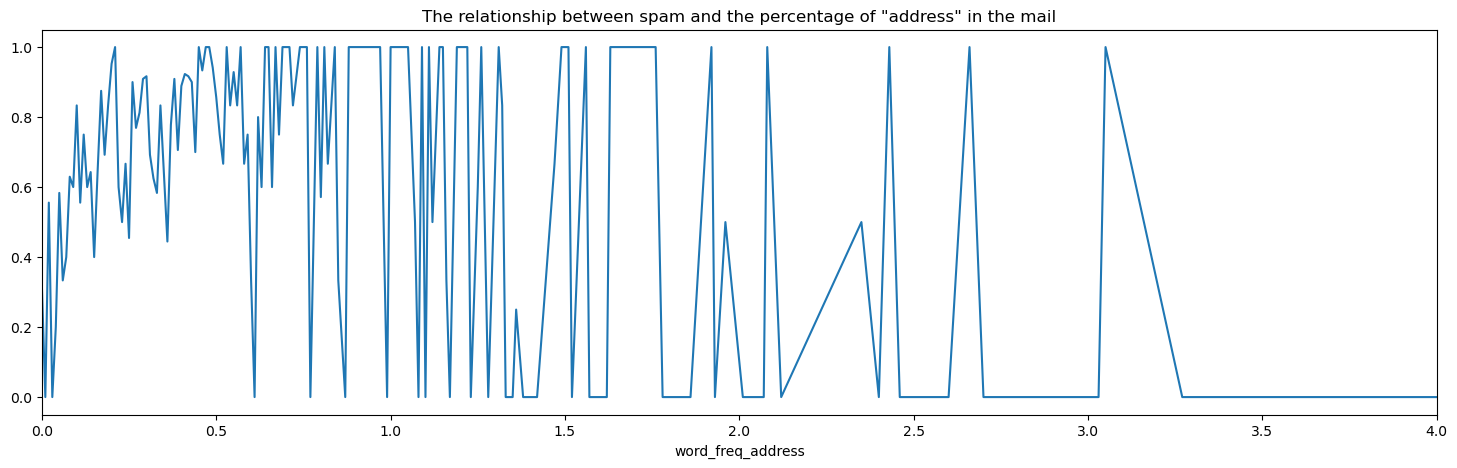

In [58]:
#The distribution of data between 0 and 4 is dense, 
#resulting in a compact arrangement of the images in this part
#so intercept this part of the image and zoom in for observationword_freq_address = df.groupby('word_freq_address')['class'].mean()
ax = word_freq_address.plot(kind='line',figsize=(18,5))
ax.set_title('The relationship between spam and the percentage of "address" in the mail')
plt.xlim(0,4)
plt.show()

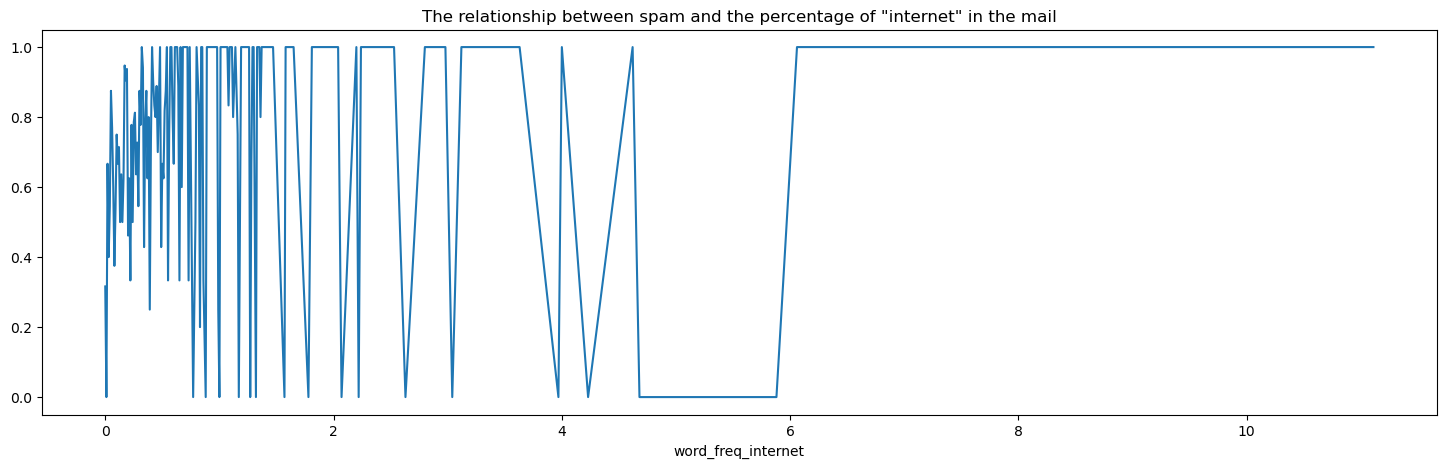

In [59]:
#show the relationship between spam and the percentage of "internet" in the mail
word_freq_internet = df.groupby('word_freq_internet')['class'].mean()
ax = word_freq_internet.plot(kind='line',figsize=(18,5))
ax.set_title('The relationship between spam and the percentage of "internet" in the mail')
plt.show()

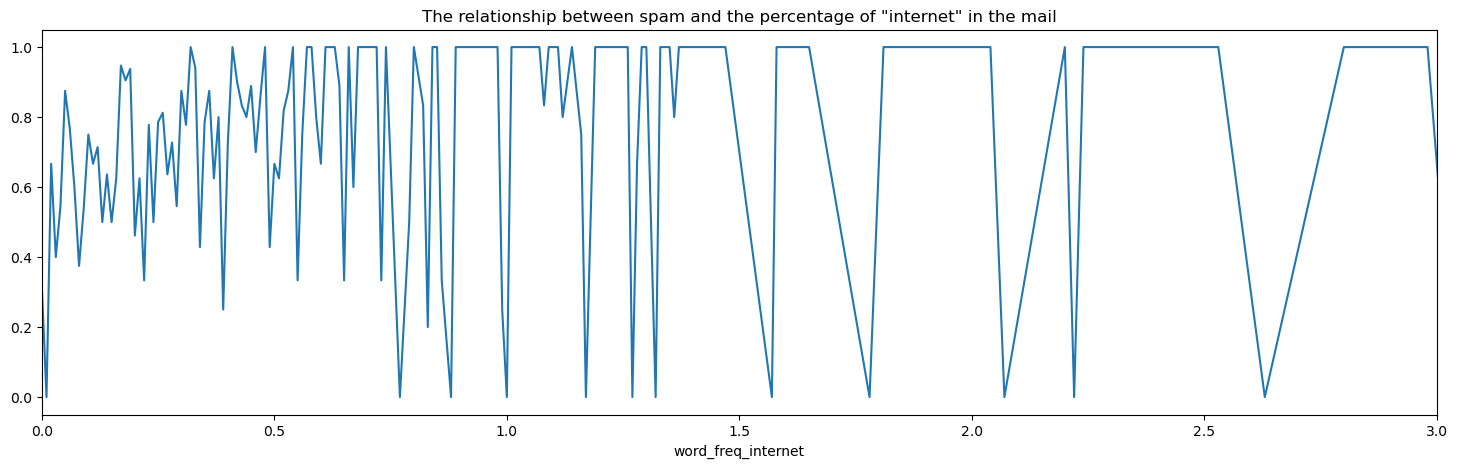

In [60]:
#The distribution of data between 0 and 3 is dense, 
#resulting in a compact arrangement of the images in this part
#so intercept this part of the image and zoom in for observationword_freq_internet = df.groupby('word_freq_internet')['class'].mean()
ax = word_freq_internet.plot(kind='line',figsize=(18,5))
ax.set_title('The relationship between spam and the percentage of "internet" in the mail')
plt.xlim(0,3)
plt.show()

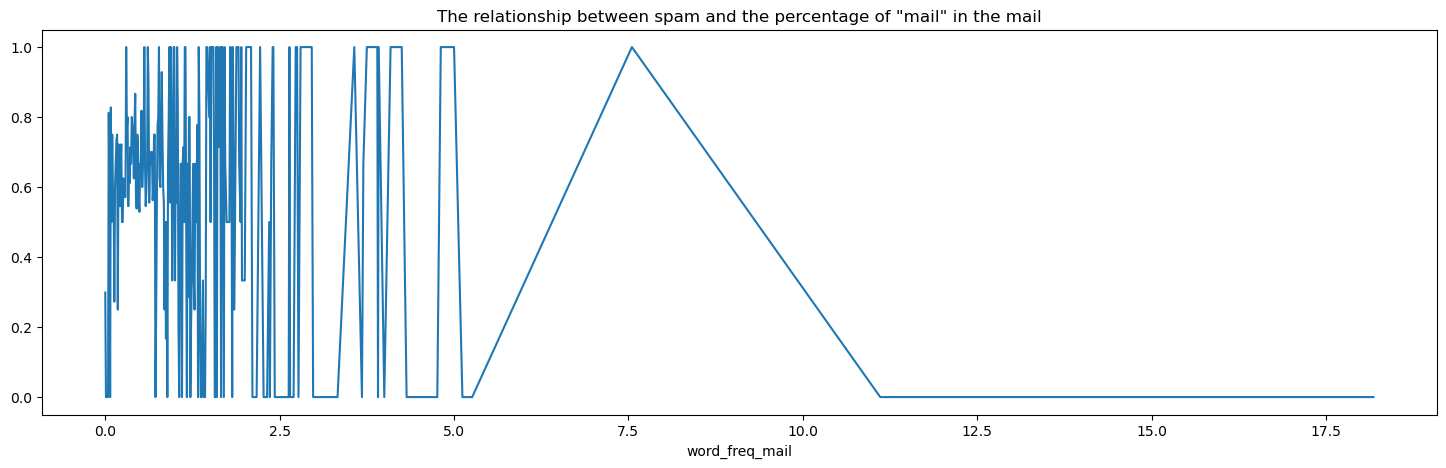

In [61]:
#show the relationship between spam and the percentage of "mail" in the mail
word_freq_mail = df.groupby('word_freq_mail')['class'].mean()
ax = word_freq_mail.plot(kind='line',figsize=(18,5))
ax.set_title('The relationship between spam and the percentage of "mail" in the mail')
plt.show()

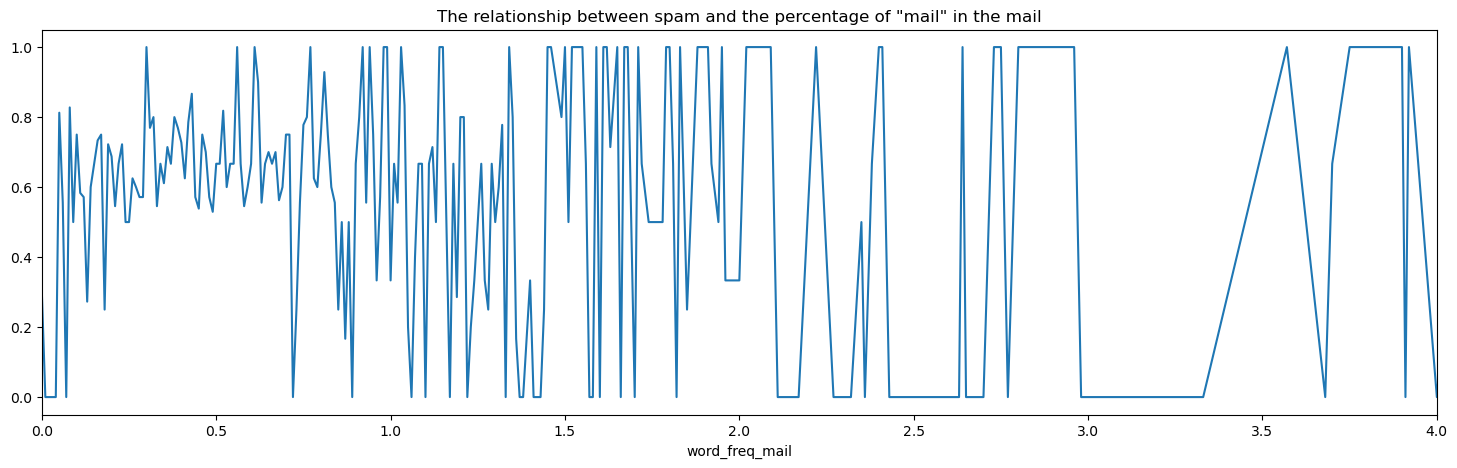

In [62]:
#The distribution of data between 0 and 4 is dense, 
#resulting in a compact arrangement of the images in this part
#so intercept this part of the image and zoom in for observationword_freq_mail = df.groupby('word_freq_mail')['class'].mean()
ax = word_freq_mail.plot(kind='line',figsize=(18,5))
ax.set_title('The relationship between spam and the percentage of "mail" in the mail')
plt.xlim(0,4)
plt.show()

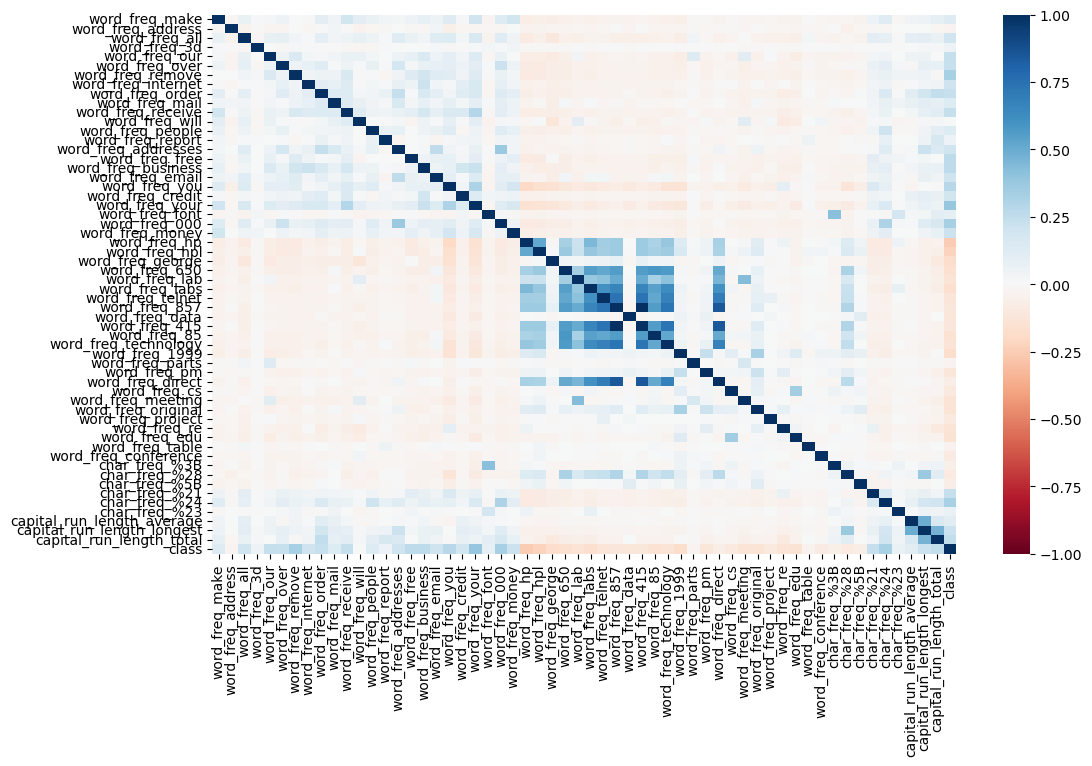

In [63]:
#show the correlation between features
fig, ax = plt.subplots()
fig.set_size_inches(12, 7)
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu")
plt.show()

In [64]:
# Partition data into both train and test data
train_data, test_data = train_test_split(df, test_size=0.40, random_state=44)
    
# Initialize normalized training, validation, and complete data frames.
scaler = StandardScaler()
scaler.fit(train_data.iloc[:,:-1])

# Transform the full dataset
df_normalized = pd.concat([pd.DataFrame(
    scaler.transform(df.iloc[:,:-1])),df[['class']]], axis=1)

train_normalized = df_normalized.iloc[train_data.index]
test_normalized = df_normalized.iloc[test_data.index]


In [65]:
# split train data and test data into x and y
train_normalized_x = pd.get_dummies(train_normalized.iloc[:,:-1])
train_normalized_y = train_normalized['class']
test_normalized_x = pd.get_dummies(test_normalized.iloc[:,:-1])
test_normalized_y = test_normalized['class']

In [66]:
# Build the linear regression model
lr = LinearRegression()
lr.fit(train_normalized_x,train_normalized_y)

# Regression coefficients
print('intercept ', lr.intercept_)
print(pd.DataFrame({'Predictor': train_normalized_x.columns, 'coefficient': lr.coef_}))

# Performance measures
regressionSummary(train_normalized_y, lr.predict(train_normalized_x))

intercept  0.3934782608695652
    Predictor  coefficient
0           0    -0.019320
1           1    -0.019452
2           2     0.014655
3           3     0.022447
4           4     0.056113
5           5     0.040233
6           6     0.075364
7           7     0.034724
8           8     0.023096
9           9     0.018581
10         10     0.003056
11         11    -0.024367
12         12     0.001863
13         13    -0.002839
14         14    -0.006614
15         15     0.059527
16         16     0.023098
17         17     0.027319
18         18     0.020381
19         19     0.025963
20         20     0.059424
21         21     0.042795
22         22     0.065280
23         23     0.029561
24         24    -0.038940
25         25    -0.016634
26         26    -0.040773
27         27     0.001975
28         28    -0.002410
29         29    -0.029925
30         30    -0.003042
31         31     0.154778
32         32    -0.021229
33         33    -0.129695
34         34    -0.03033

In [67]:
lr_pred = lr.predict(test_normalized_x)
# Accuracy measures
regressionSummary(test_normalized_y, lr_pred)
lr.score(test_normalized_x,test_normalized_y)


Regression statistics

               Mean Error (ME) : 0.0026
Root Mean Squared Error (RMSE) : 0.3350
     Mean Absolute Error (MAE) : 0.2621


0.5304000417266044

In [68]:
#use Ridge Regression for Shrinkage 
print('Ridge')
ridge = Ridge(alpha=1)
ridge.fit(train_normalized_x,train_normalized_y)
regressionSummary(test_normalized_y, ridge.predict(test_normalized_x))
print('\nRidge coefficients', ridge.coef_)

Ridge

Regression statistics

               Mean Error (ME) : 0.0026
Root Mean Squared Error (RMSE) : 0.3348
     Mean Absolute Error (MAE) : 0.2620

Ridge coefficients [-0.01936142 -0.01942532  0.01469999  0.02244471  0.05609321  0.04022931
  0.0753648   0.03471923  0.02311401  0.01859749  0.00308128 -0.02437067
  0.00188266 -0.00281376 -0.00659893  0.05951003  0.02311231  0.0272998
  0.02039359  0.02597418  0.05945563  0.04278496  0.06528993  0.02958793
 -0.03891412 -0.01665872 -0.04074624  0.00194876 -0.00239638 -0.02988782
 -0.00296641  0.13088699 -0.02121413 -0.10597291 -0.03029807  0.02755792
 -0.01847555 -0.00871344 -0.0143135   0.00669215 -0.00581596 -0.03035117
 -0.00811983 -0.02147489 -0.03178831 -0.03479806 -0.0152534  -0.01541785
 -0.03951165 -0.01218448 -0.0014979   0.06843532  0.05280924  0.01484637
 -0.00450909  0.03188907  0.04486528]


In [69]:
#use Lasso for Shrinkage
print('Lasso')
lasso = Lasso(alpha=1)
lasso.fit(train_normalized_x,train_normalized_y)
regressionSummary(test_normalized_y, lasso.predict(test_normalized_x))
print('\nLasso coefficients', lasso.coef_)

print('\nLasso Cross-Validation')
lasso_cv = LassoCV(cv=100)
lasso_cv.fit(train_normalized_x,train_normalized_y)
regressionSummary(test_normalized_y, lasso_cv.predict(test_normalized_x))

print('\nLasso-CV chosen regularization: ', lasso_cv.alpha_)

Lasso

Regression statistics

               Mean Error (ME) : 0.0014
Root Mean Squared Error (RMSE) : 0.4888
     Mean Absolute Error (MAE) : 0.4776

Lasso coefficients [ 0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.  0.  0.
  0.  0.  0.]

Lasso Cross-Validation

Regression statistics

               Mean Error (ME) : 0.0021
Root Mean Squared Error (RMSE) : 0.3324
     Mean Absolute Error (MAE) : 0.2618

Lasso-CV chosen regularization:  0.0028970017857261826


In [70]:
pd.DataFrame({'features': train_normalized_x.columns, 
              'linear regression': lr.coef_, 
              'ridge': ridge.coef_,
              'lasso': lasso.coef_,
              'lassoCV': lasso_cv.coef_})

,features,linear regression,ridge,lasso,lassoCV
0,0,-0.019320,-0.019361,0.0,-0.014354
1,1,-0.019452,-0.019425,-0.0,-0.015419
2,2,0.014655,0.014700,0.0,0.013042
3,3,0.022447,0.022445,0.0,0.020194
4,4,0.056113,0.056093,0.0,0.054903
5,5,0.040233,0.040229,0.0,0.040262
6,6,0.075364,0.075365,0.0,0.075905
7,7,0.034724,0.034719,0.0,0.033810
8,8,0.023096,0.023114,0.0,0.021646
9,9,0.018581,0.018597,0.0,0.016172


In [71]:
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
log_reg=LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
log_reg.fit(train_normalized_x,train_normalized_y)

print('intercept ', log_reg.intercept_[0])
print(pd.DataFrame({'coeff': log_reg.coef_[0]}, index=train_normalized_x.columns).transpose())
print()

### Akaike information criterion (AIC) (Akaike, 1974) is a fined technique based on in-sample 
### fit to estimate the likelihood of a model to predict/estimate the future values.
print('AIC', AIC_score(test_normalized_y, log_reg.predict(test_normalized_x), df = len(test_normalized_x.columns) + 1))

intercept  -9.447838085047946
             0         1         2         3         4         5         6   \
coeff -0.083216 -0.274495  0.017197  4.584784  0.386499  0.321275  0.735789   

             7         8         9   ...        47        48        49  \
coeff  0.164494  0.283923  0.230107  ... -1.039931 -0.510031 -0.232382   

             50        51        52        53        54        55        56  
coeff -0.096454  0.462909  1.090843  1.248171  3.184093  0.668172  0.658557  

[1 rows x 57 columns]

AIC 419.9239477797755


In [72]:
y_trainpred=log_reg.predict(train_normalized_x)
y_testpred=log_reg.predict(test_normalized_x)
y_testproba = log_reg.predict_proba(test_normalized_x)

# get the accuracy
classificationSummary(train_normalized_y, y_trainpred)
classificationSummary(test_normalized_y, y_testpred)

Confusion Matrix (Accuracy 0.9344)

       Prediction
Actual    0    1
     0 1598   76
     1  105  981
Confusion Matrix (Accuracy 0.9310)

       Prediction
Actual    0    1
     0 1060   54
     1   73  654


In [73]:
# iterate over a range of nearest neighbor values
# train and check with test
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_normalized_x,train_normalized_y)
    results.append({'k': k, 'accuracy': accuracy_score(test_normalized_y, knn.predict(test_normalized_x))})
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.906573
1    2  0.889191
2    3  0.908202
3    4  0.898425
4    5  0.904400
5    6  0.903313
6    7  0.907116
7    8  0.900598
8    9  0.902770
9   10  0.896795
10  11  0.897882
11  12  0.896795
12  13  0.901141
13  14  0.894622


In [74]:
# when k=3 we have maximum accuracy
knn = KNeighborsClassifier(n_neighbors=3).fit(train_normalized_x,train_normalized_y)
classificationSummary(train_normalized_y, knn.predict(train_normalized_x)) 
print()
classificationSummary(test_normalized_y, knn.predict(test_normalized_x))
print()

Confusion Matrix (Accuracy 0.9478)

       Prediction
Actual    0    1
     0 1603   71
     1   73 1013

Confusion Matrix (Accuracy 0.9082)

       Prediction
Actual    0    1
     0 1037   77
     1   92  635



In [75]:
#There are negative values after the data is normalized, so we use the original train data and test data
train_x = pd.get_dummies(train_data.iloc[:,:-1])
train_y = train_data['class']
test_x = pd.get_dummies(test_data.iloc[:,:-1])
test_y = test_data['class']

In [76]:
# run naive Bayes
nb = MultinomialNB(alpha=0.01)
nb.fit(train_x,train_y)

# predict probabilities
predProb_train = nb.predict_proba(train_x)
predProb_test = nb.predict_proba(test_x)

# predict class membership
Y_train_pred = nb.predict(train_x)
Y_test_pred = nb.predict(test_x)

# accuracy
classificationSummary(train_y, Y_train_pred) 
print()
classificationSummary(test_y, Y_test_pred)
print()

Confusion Matrix (Accuracy 0.8011)

       Prediction
Actual    0    1
     0 1395  279
     1  270  816

Confusion Matrix (Accuracy 0.8131)

       Prediction
Actual   0   1
     0 940 174
     1 170 557



The accracy of Linear_regression model is 0.5304.

The accracy of KNN classification model is 0.9082.

The accuracy of Naive Bayes classification model is 0.8131.

The accuracy of Logistic Regression classification model is 0.9310.

Therefore, Logistic Regression classification model is a good fit for this dataset.

In [77]:
#build a set of predict data
predict_data = {
    'word_freq_make': [0.64,0.21,0,0.35,0.98],
    'word_freq_address':[0.12,1.35,0,0.36,0.89],
    'word_freq_all':[0,0,0.21,0.88,0.56],
    'word_freq_3d':[0.21,0.36,0.54,0.32,0],
    'word_freq_our':[0.12,1.35,0,0.36,0.89],
    'word_freq_over':[0.64,0.21,0,0.35,0.98],
    'word_freq_remove':[0,0,0,0,0],
    'word_freq_internet':[0.12,1.35,0,0.36,0.89],
    'word_freq_order':[0.64,0.21,0,0.35,0.98],
    'word_freq_mail':[0.12,1.35,0,0.36,0.89],
    'word_freq_receive' :[0.12,1.35,0,0.36,0.89],
    'word_freq_will':[1,1,1.23,1.28,0.98],
    'word_freq_people':[0.12,1.35,0,0.36,0.89],
    'word_freq_report':[0.64,0.21,0,0.35,0.98],
    'word_freq_addresses':[1,1,1.23,1.28,0.98],
    'word_freq_free':[0.56,0.87,0.28,0.95,0.2],
    'word_freq_business':[1,1,1.23,1.28,0.98],
    'word_freq_email':[0.64,0.21,0,0.35,0.98],
    'word_freq_you':[1,1,1.23,1.28,0.98],
    'word_freq_credit':[0,0,0,0,0],
    'word_freq_your':[1,1,1.23,1.28,0.98],
    'word_freq_font': [0.56,0.87,0.28,0.95,0.2],
    'word_freq_000':[1,1,1.23,1.28,0.98],
    'word_freq_money':[0.64,0.21,0,0.35,0.98],
    'word_freq_hp': [0.56,0.87,0.28,0.95,0.2],
    'word_freq_hpl':[0.64,0.21,0,0.35,0.98],
    'word_freq_george':[0.56,0.87,0.28,0.95,0.2],
    'word_freq_650':[0.64,0.21,0,0.35,0.98],
    'word_freq_lab':[0.56,0.87,0.28,0.95,0.2],
    'word_freq_labs':[0.64,0.21,0,0.35,0.98],
    'word_freq_telnet':[0.12,1.35,0,0.36,0.89],
    'word_freq_857':[0,0,0,0,0],
    'word_freq_data':[1,1,1.23,1.28,0.98],
    'word_freq_415':[0.56,0.87,0.28,0.95,0.2],
    'word_freq_85':[0,0,0,0,0],
    'word_freq_technology':[1,1,1.23,1.28,0.98],
    'word_freq_1999':[0.56,0.87,0.28,0.95,0.2],
    'word_freq_parts':[0,0,0,0,0],
    'word_freq_pm':[0,0,0,0,0],
    'word_freq_direct':[0.56,0.87,0.28,0.95,0.2],
    'word_freq_cs':[0.12,1.35,0,0.36,0.89],
    'word_freq_meeting':[0.56,0.87,0.28,0.95,0.2],
    'word_freq_original':[0,0,0,0,0],
    'word_freq_project':[0.12,1.35,0,0.36,0.89],
    'word_freq_re':[1,1,1.23,1.28,0.98],
    'word_freq_edu':[0.12,1.35,0,0.36,0.89],
    'word_freq_table':[0.56,0.87,0.28,0.95,0.2],
    'word_freq_conference' :[1,1,1.23,1.28,0.98],
    'char_freq_%3B':[0.238,0.258,0.984,0.394,0],
    'char_freq_%28':[0.19,0,0,0.65,0.78],
    'char_freq_%5B':[0.238,0.258,0.984,0.394,0],
    'char_freq_%21':[0.19,0,0,0.65,0.78],
    'char_freq_%24':[0,0,0,0,0],
    'char_freq_%23':[0.238,0.258,0.984,0.394,0],
    'capital_run_length_average':[3.894,1.974,1.658,2.684,5.698],
    'capital_run_length_longest': [62,100,40,15,6],
    'capital_run_length_total':[1002,264,1894,65,698]}
predict_df = pd.DataFrame(predict_data)
predict_normalized = pd.DataFrame(scaler.transform(predict_df))
                                


In [78]:
df_x = df_normalized.iloc[:,:-1]
df_y = df_normalized['class']

#Use KNN model with k=3
#Train the model using the full dataset
knn = KNeighborsClassifier(n_neighbors=3).fit(df_x,df_y)
distances, indices = knn.kneighbors(predict_normalized)
predictions = knn.predict(predict_normalized)

#show predictions
for index, prediction in enumerate(predictions):
    print(64 * '-')
    print(prediction)
    print(predict_df.iloc[index])
    print(df.iloc[indices[index], :])
    print(df_normalized.iloc[indices[index], :])

----------------------------------------------------------------
0
word_freq_make                   0.640
word_freq_address                0.120
word_freq_all                    0.000
word_freq_3d                     0.210
word_freq_our                    0.120
word_freq_over                   0.640
word_freq_remove                 0.000
word_freq_internet               0.120
word_freq_order                  0.640
word_freq_mail                   0.120
word_freq_receive                0.120
word_freq_will                   1.000
word_freq_people                 0.120
word_freq_report                 0.640
word_freq_addresses              1.000
word_freq_free                   0.560
word_freq_business               1.000
word_freq_email                  0.640
word_freq_you                    1.000
word_freq_credit                 0.000
word_freq_your                   1.000
word_freq_font                   0.560
word_freq_000                    1.000
word_freq_money                  0.6

      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
711             0.95               0.00           0.47          0.95   
1764            0.96               0.00           0.48          0.00   
1713            0.36               0.29           0.36          0.00   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
711             0.0            0.95              0.00                0.00   
1764            0.0            0.96              0.00                0.00   
1713            0.0            0.58              0.07                0.14   

      word_freq_order  word_freq_mail  ...  char_freq_%3B  char_freq_%28  \
711              0.47            0.00  ...            0.0          0.791   
1764             0.48            0.00  ...            0.0          0.818   
1713             0.66            1.25  ...            0.0          0.000   

      char_freq_%5B  char_freq_%21  char_freq_%24  char_freq_%23  \
711             0.0          

In [79]:
#Use Naive Bayes model
#Train the model using the full dataset
#There are negative values after the data is normalized, so we use the original data
nb.fit(df.iloc[:,:-1],df['class'])
predictions = nb.predict(predict_df)

#show predictions
for index, prediction in enumerate(predictions):
    print(64 * '-')
    print(prediction)
    print(predict_df.iloc[index])

----------------------------------------------------------------
0
word_freq_make                   0.640
word_freq_address                0.120
word_freq_all                    0.000
word_freq_3d                     0.210
word_freq_our                    0.120
word_freq_over                   0.640
word_freq_remove                 0.000
word_freq_internet               0.120
word_freq_order                  0.640
word_freq_mail                   0.120
word_freq_receive                0.120
word_freq_will                   1.000
word_freq_people                 0.120
word_freq_report                 0.640
word_freq_addresses              1.000
word_freq_free                   0.560
word_freq_business               1.000
word_freq_email                  0.640
word_freq_you                    1.000
word_freq_credit                 0.000
word_freq_your                   1.000
word_freq_font                   0.560
word_freq_000                    1.000
word_freq_money                  0.6

In [80]:
#Use Logistic regression model
#Train the model using the full datasetlog_reg.fit(df_x,df_y)
predictions = log_reg.predict(predict_normalized)

#show predictions
for index, prediction in enumerate(predictions):
    print(64 * '-')
    print(prediction)
    print(predict_df.iloc[index])

----------------------------------------------------------------
0
word_freq_make                   0.640
word_freq_address                0.120
word_freq_all                    0.000
word_freq_3d                     0.210
word_freq_our                    0.120
word_freq_over                   0.640
word_freq_remove                 0.000
word_freq_internet               0.120
word_freq_order                  0.640
word_freq_mail                   0.120
word_freq_receive                0.120
word_freq_will                   1.000
word_freq_people                 0.120
word_freq_report                 0.640
word_freq_addresses              1.000
word_freq_free                   0.560
word_freq_business               1.000
word_freq_email                  0.640
word_freq_you                    1.000
word_freq_credit                 0.000
word_freq_your                   1.000
word_freq_font                   0.560
word_freq_000                    1.000
word_freq_money                  0.6